# PIMA Indians Diabetes predictions using SVM

This project uses the PIMA Indians Diabetes dataset to predict the likelihood of diabetes in female patients based on medical and lifestyle attributes such as glucose levels, BMI, insulin, and age. The data is preprocessed through handling of missing values and feature scaling. Support Vector Machine (SVM) is employed as the primary classification algorithm, with kernel tuning (linear, RBF, and polynomial) to optimize model performance. Evaluation metrics like accuracy, precision, recall, F1-score, and ROC-AUC are used to assess effectiveness. This model aims to aid early diagnosis and inform healthcare decisions with accurate predictions.

## **Step 1 : Import Libraries and Load Data**
* **pandas(pd)**: For loading, manipulating, and analyzing datasets (e.g., CSV files, DataFrames).
* **numpy(np)**: For numerical computations, array handling, and mathematical operations.
* **linear_model**: Module containing multiple regression algorithms.
* **LinearRegression**: Specifically used to perform linear regression for predicting continuous outcomes like CO₂ emissions.
* **SVC**: Support Vector Classifier, a powerful algorithm used for classification tasks like food adulteration detection.
* **matplotlib.pyplot(plt)**: Base library for 2D plotting (line plots, histograms, bar charts, etc.).
* **seaborn(sns)**: High-level interface for drawing attractive statistical graphics like boxplots, heatmaps, violin plots.
* **sklearn.preprocessing**:
  * **OneHotEncoder**: Converts categorical variables into binary columns (e.g., "Fuel Type" → "Petrol", "Diesel").
  * **LabelEncoder**: Converts labels into numeric form.
  * **StandardScaler**: Scales numerical features to a standard normal distribution (mean=0, std=1).
  * **label_binarize**: Used to convert class labels into a format suitable for multiclass classification evaluation (ROC/AUC).
* sklearn.model_selection:
  * **train_test_split**: Splits data into training and testing sets for model validation.
  * **GridSearchCV**: Performs exhaustive search over specified hyperparameter values to find the best model settings.
* **sklearn.metrics**:
  * **MAE, MSE, R²**: Metrics used to evaluate regression models (e.g., for CO₂ prediction):
  * **MAE**: Average magnitude of errors.
  * **MSE**: Penalizes larger errors.
  * **R² Score**: Goodness-of-fit measure (closer to 1 is better).
  * **accuracy_score**: Percentage of correct predictions.
  * **classification_report**: Summary of precision, recall, F1-score.
  * **confusion_matrix & ConfusionMatrixDisplay**: Show actual vs predicted classifications.
  * **roc_curve**: Plots true positive rate vs false positive rate.
  * **auc**: Area Under the ROC Curve – higher is better.
  * **RocCurveDisplay**: Automatically generates ROC curve visualization.
  * **roc_auc_score**: Scalar score summarizing ROC curve performance.
* **sklearn.multiclass**:
  * **OneVsRestClassifier**: Allows classifiers like SVM to handle multiclass problems by breaking them into multiple binary classifications.

In [71]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelEncoder, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay,roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore")

In [72]:
df=pd.read_csv(r"C:\Users\Sarita Safare\Downloads\PIMA Indians Diabetes Dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [74]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [76]:
df.shape

(768, 9)

In [77]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [78]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
# Correlation Heatmap

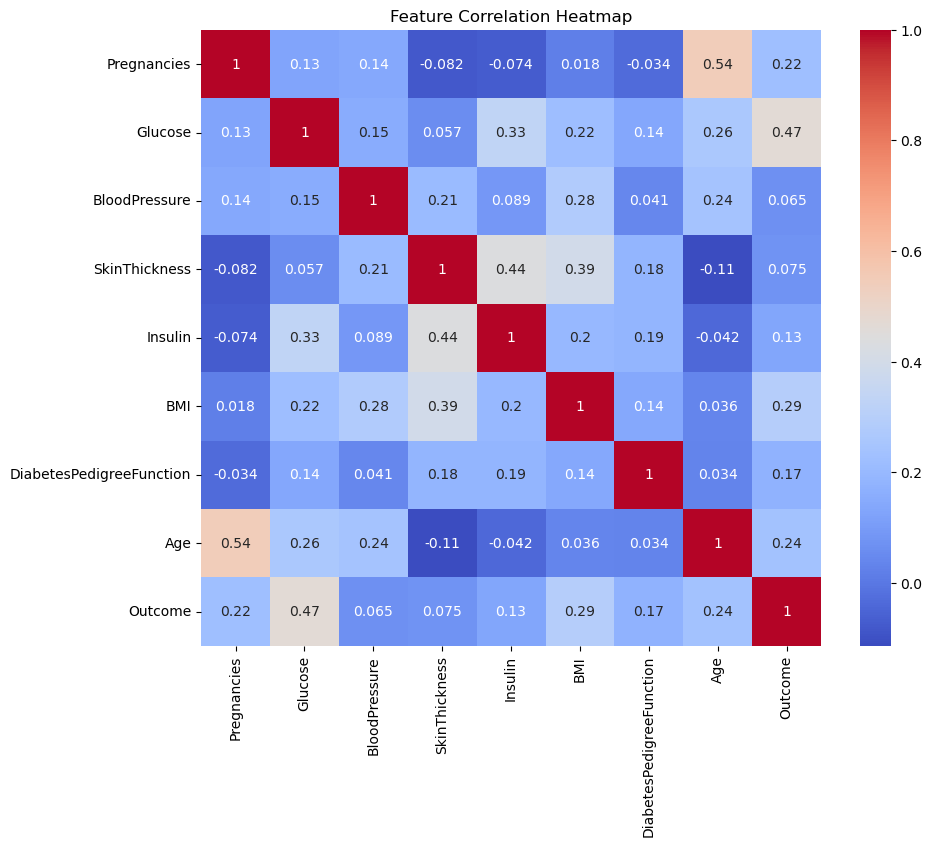

In [81]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [82]:
target_column = 'Outcome'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [83]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [84]:
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.8, random_state=42)

In [86]:
model= SVC()
model

SVC()

In [87]:
model.fit(x_train,y_train)

SVC()

In [88]:
y_pred = model.predict(x_test)

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [90]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [91]:
y_pred = svm_model.predict(X_test_scaled)
y_probs = svm_model.predict_proba(X_test_scaled)[:, 1] 

In [92]:
acc = accuracy_score(y_test,y_pred)
acc

0.7300813008130081

<Figure size 800x600 with 0 Axes>

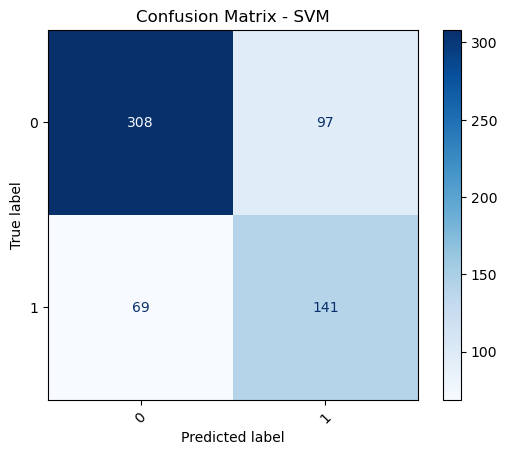

In [93]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - SVM")
plt.show()

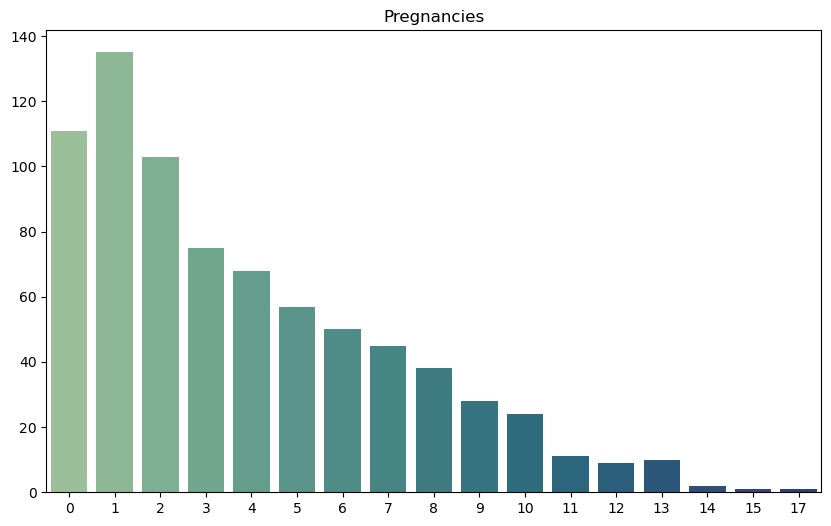

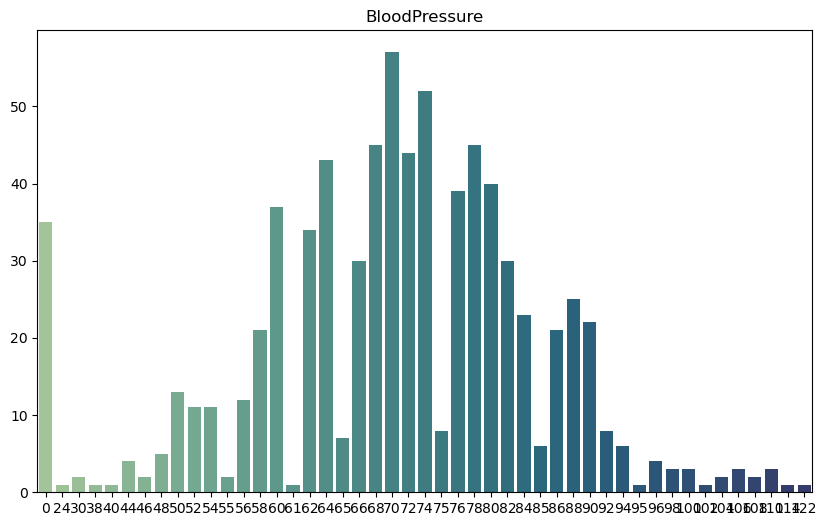

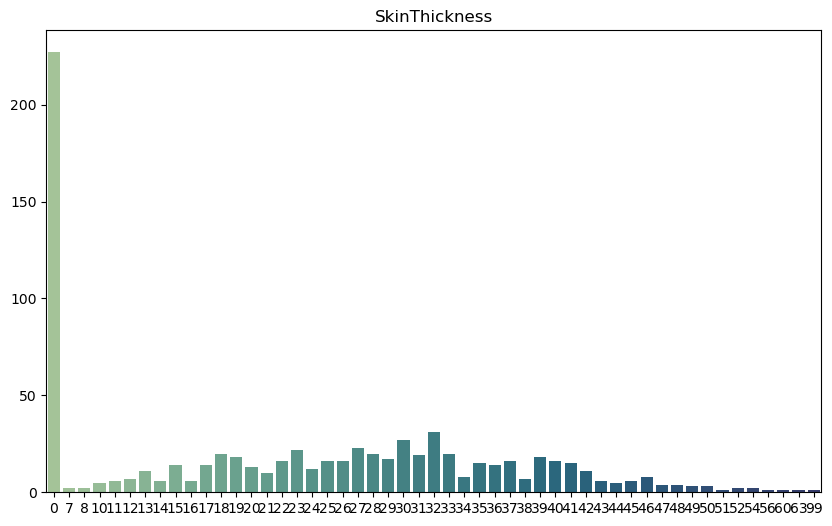

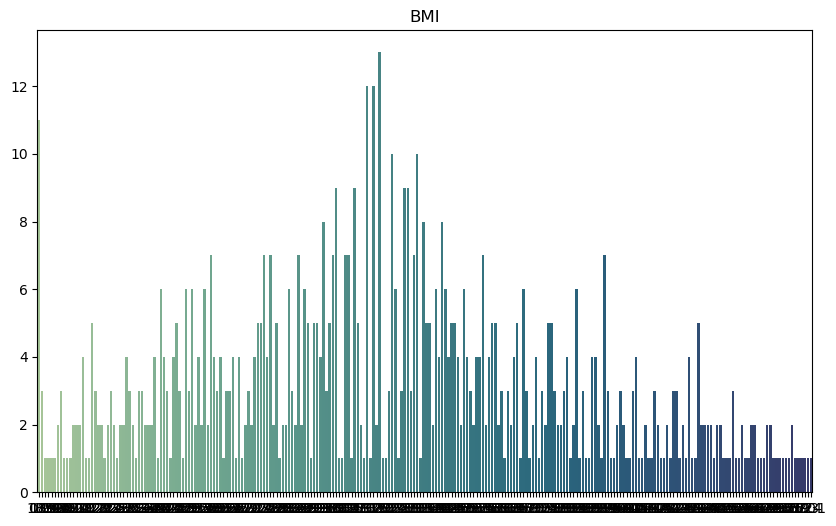

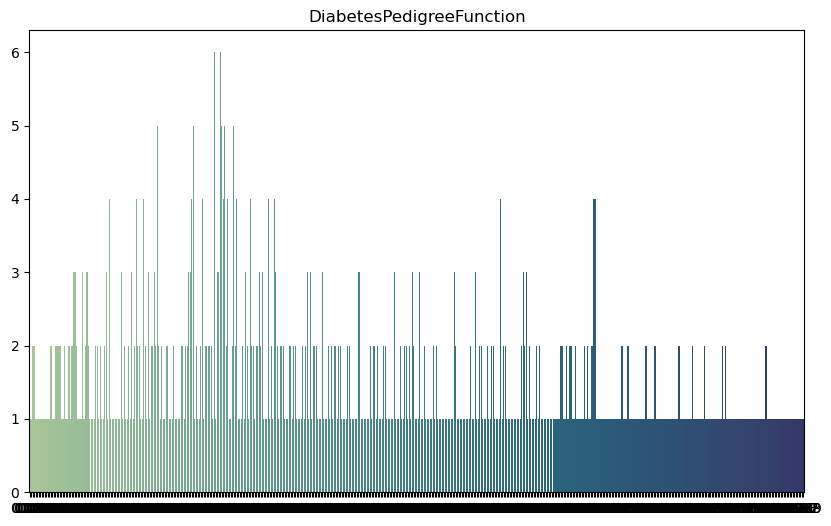

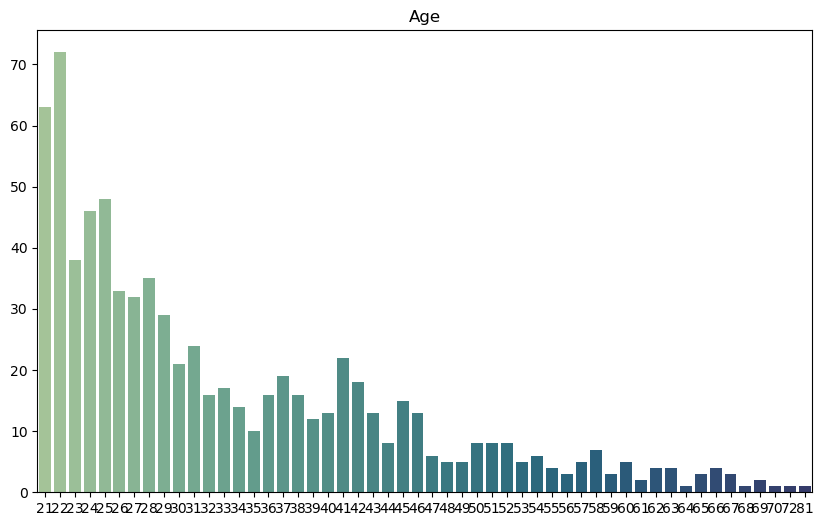

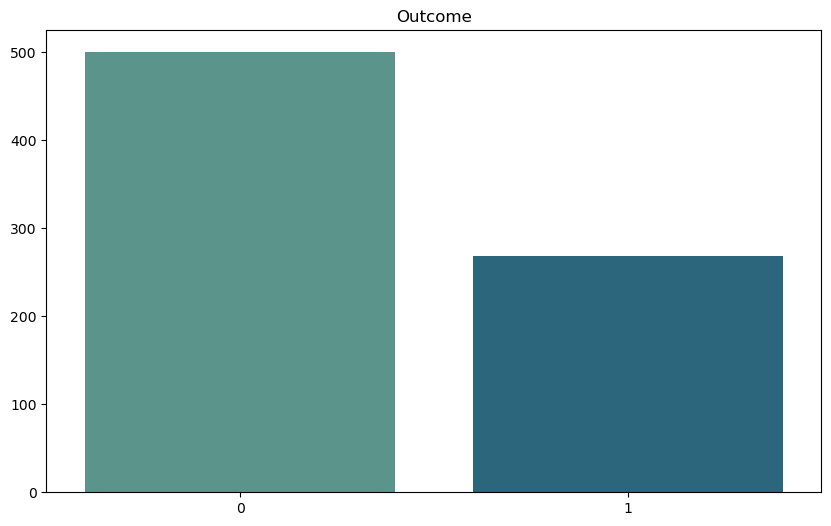

In [94]:
df.drop(columns=['Glucose', 'Insulin'], inplace=True)

for col in df.columns:
    data = df[col].value_counts().reset_index()
    plt.figure(figsize=(10,6))
    plt.title(col)
    sns.barplot(data=data, x=col, y='count', palette='crest')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# ROC Curve (for Binary Classification)

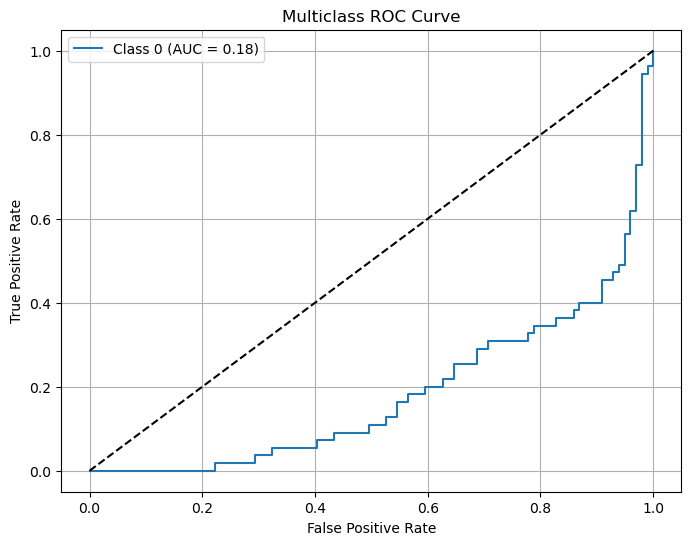

In [96]:
y_bin = label_binarize(y, classes=np.unique(y))
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

svm_clf = OneVsRestClassifier(SVC(kernel="linear", probability=True))
svm_clf.fit(X_train, y_train_bin)
y_score = svm_clf.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.grid()
plt.show()


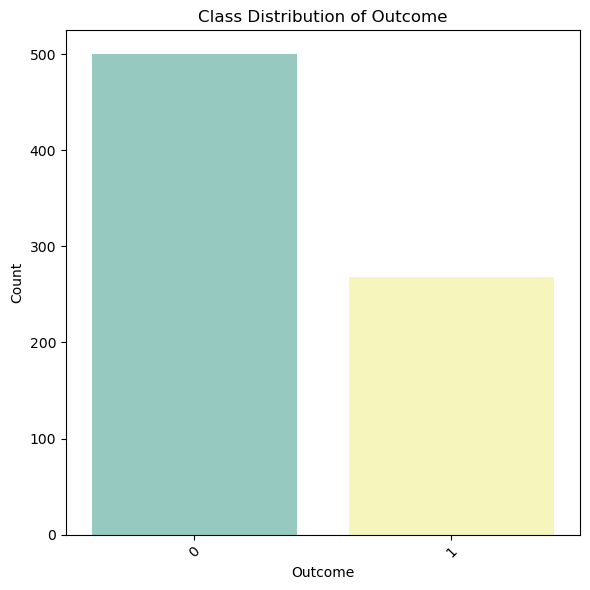

In [97]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outcome', data=df, palette='Set3')
plt.title('Class Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Histogram of All Numerical Features

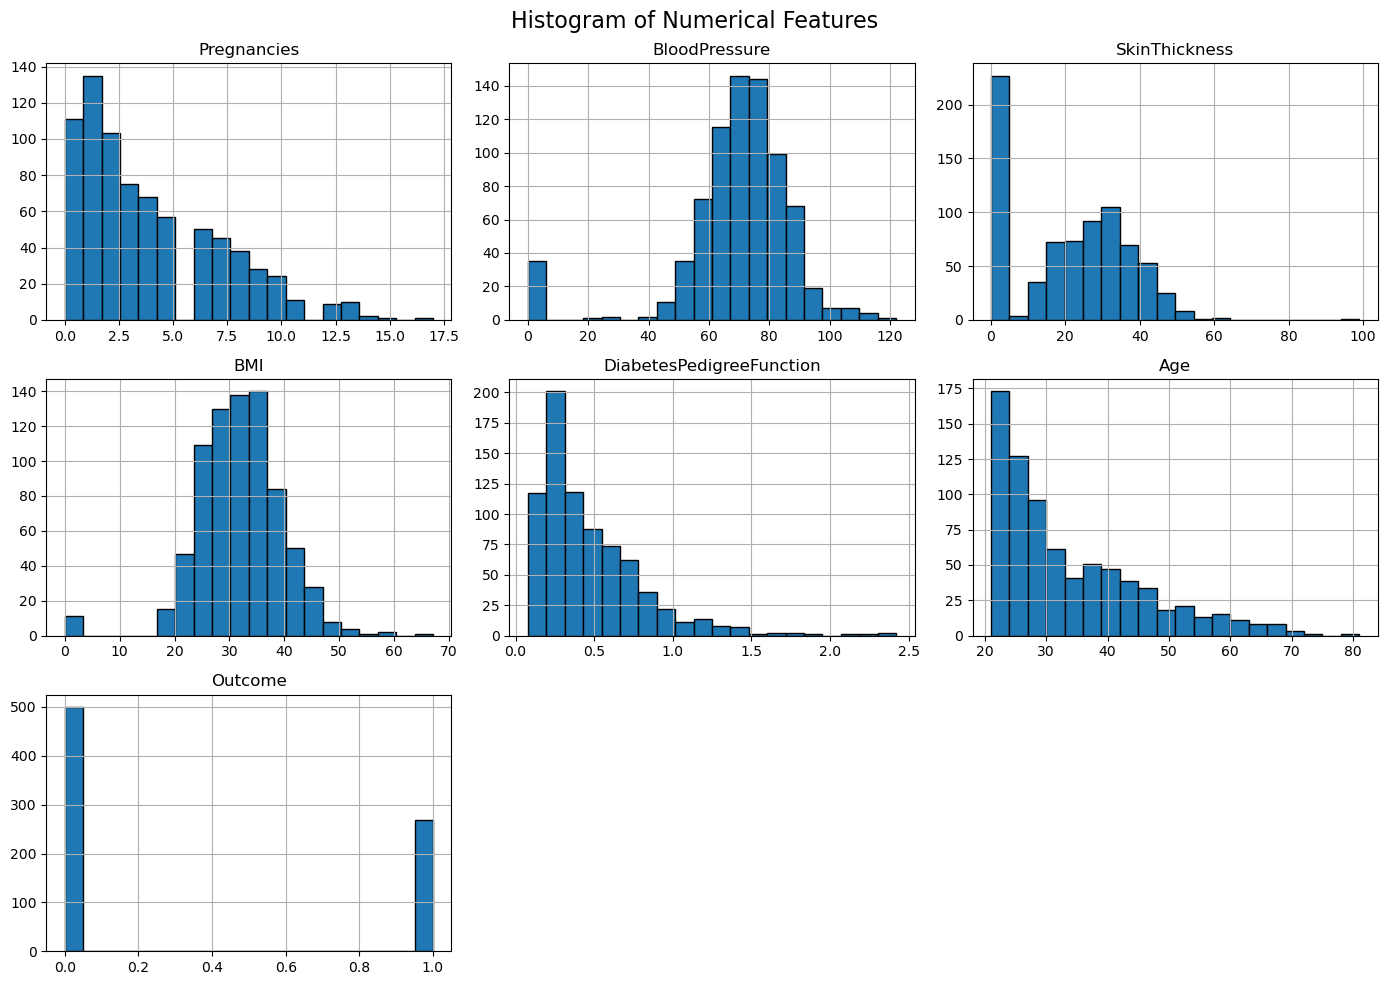

In [99]:
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Box Plots for Feature Distribution by Class

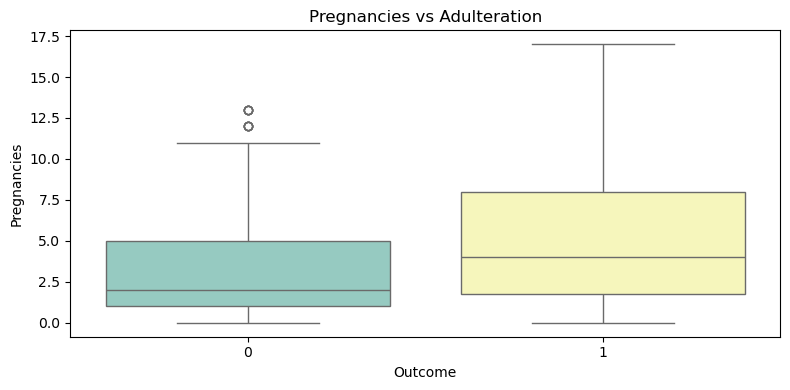

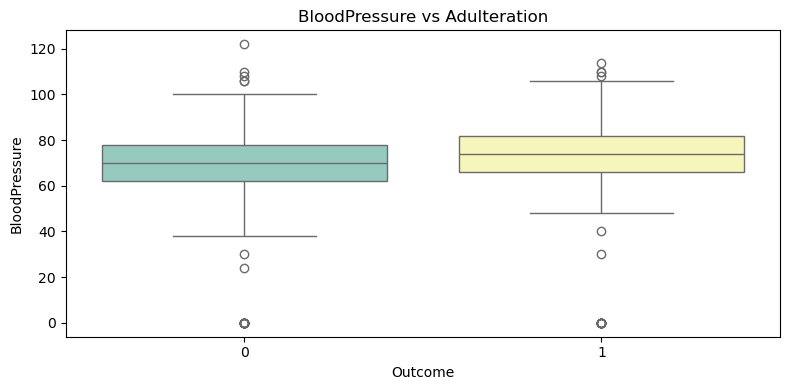

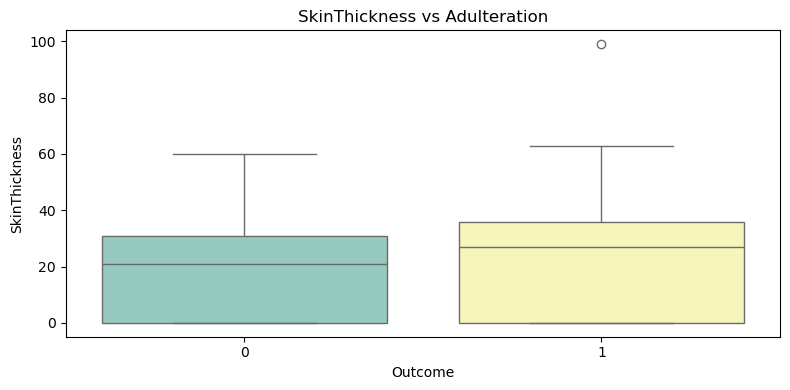

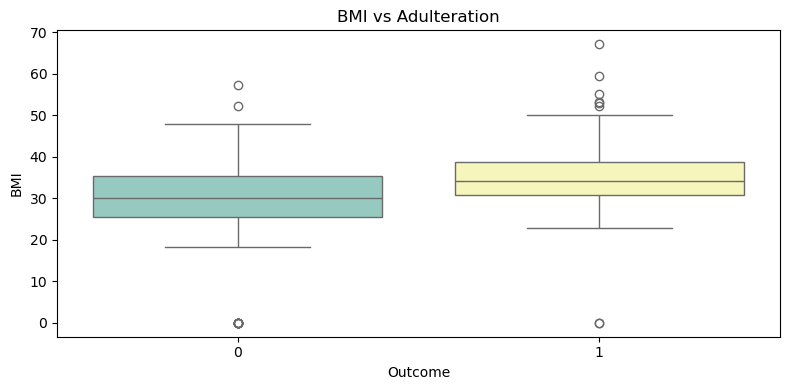

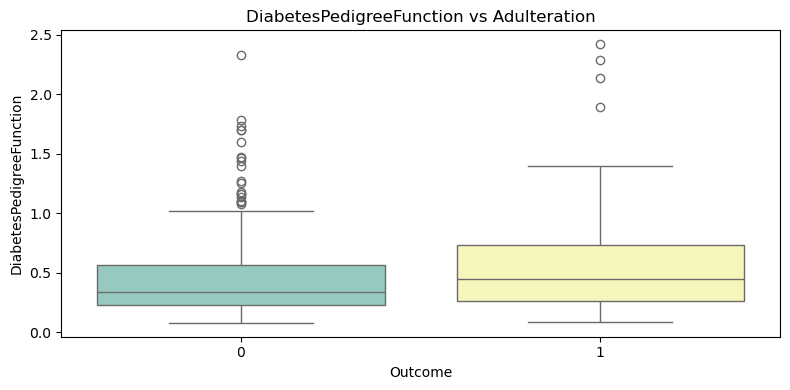

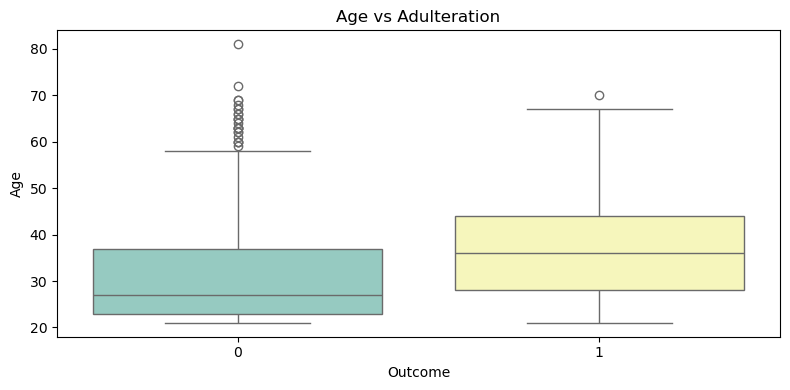

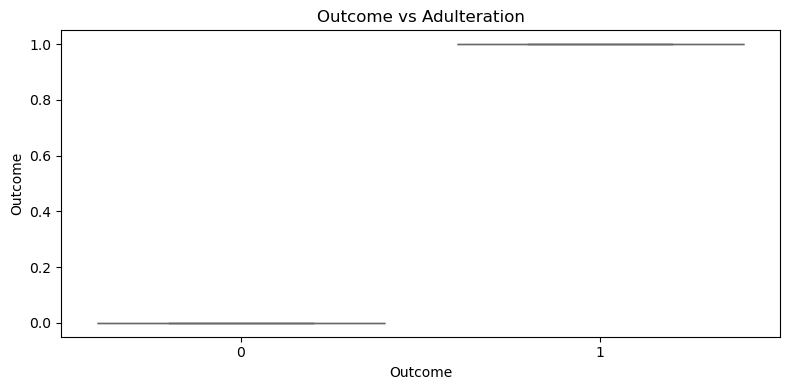

In [101]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs Adulteration')
    plt.tight_layout()
    plt.show()


# Pairplot of Features (Sampled)

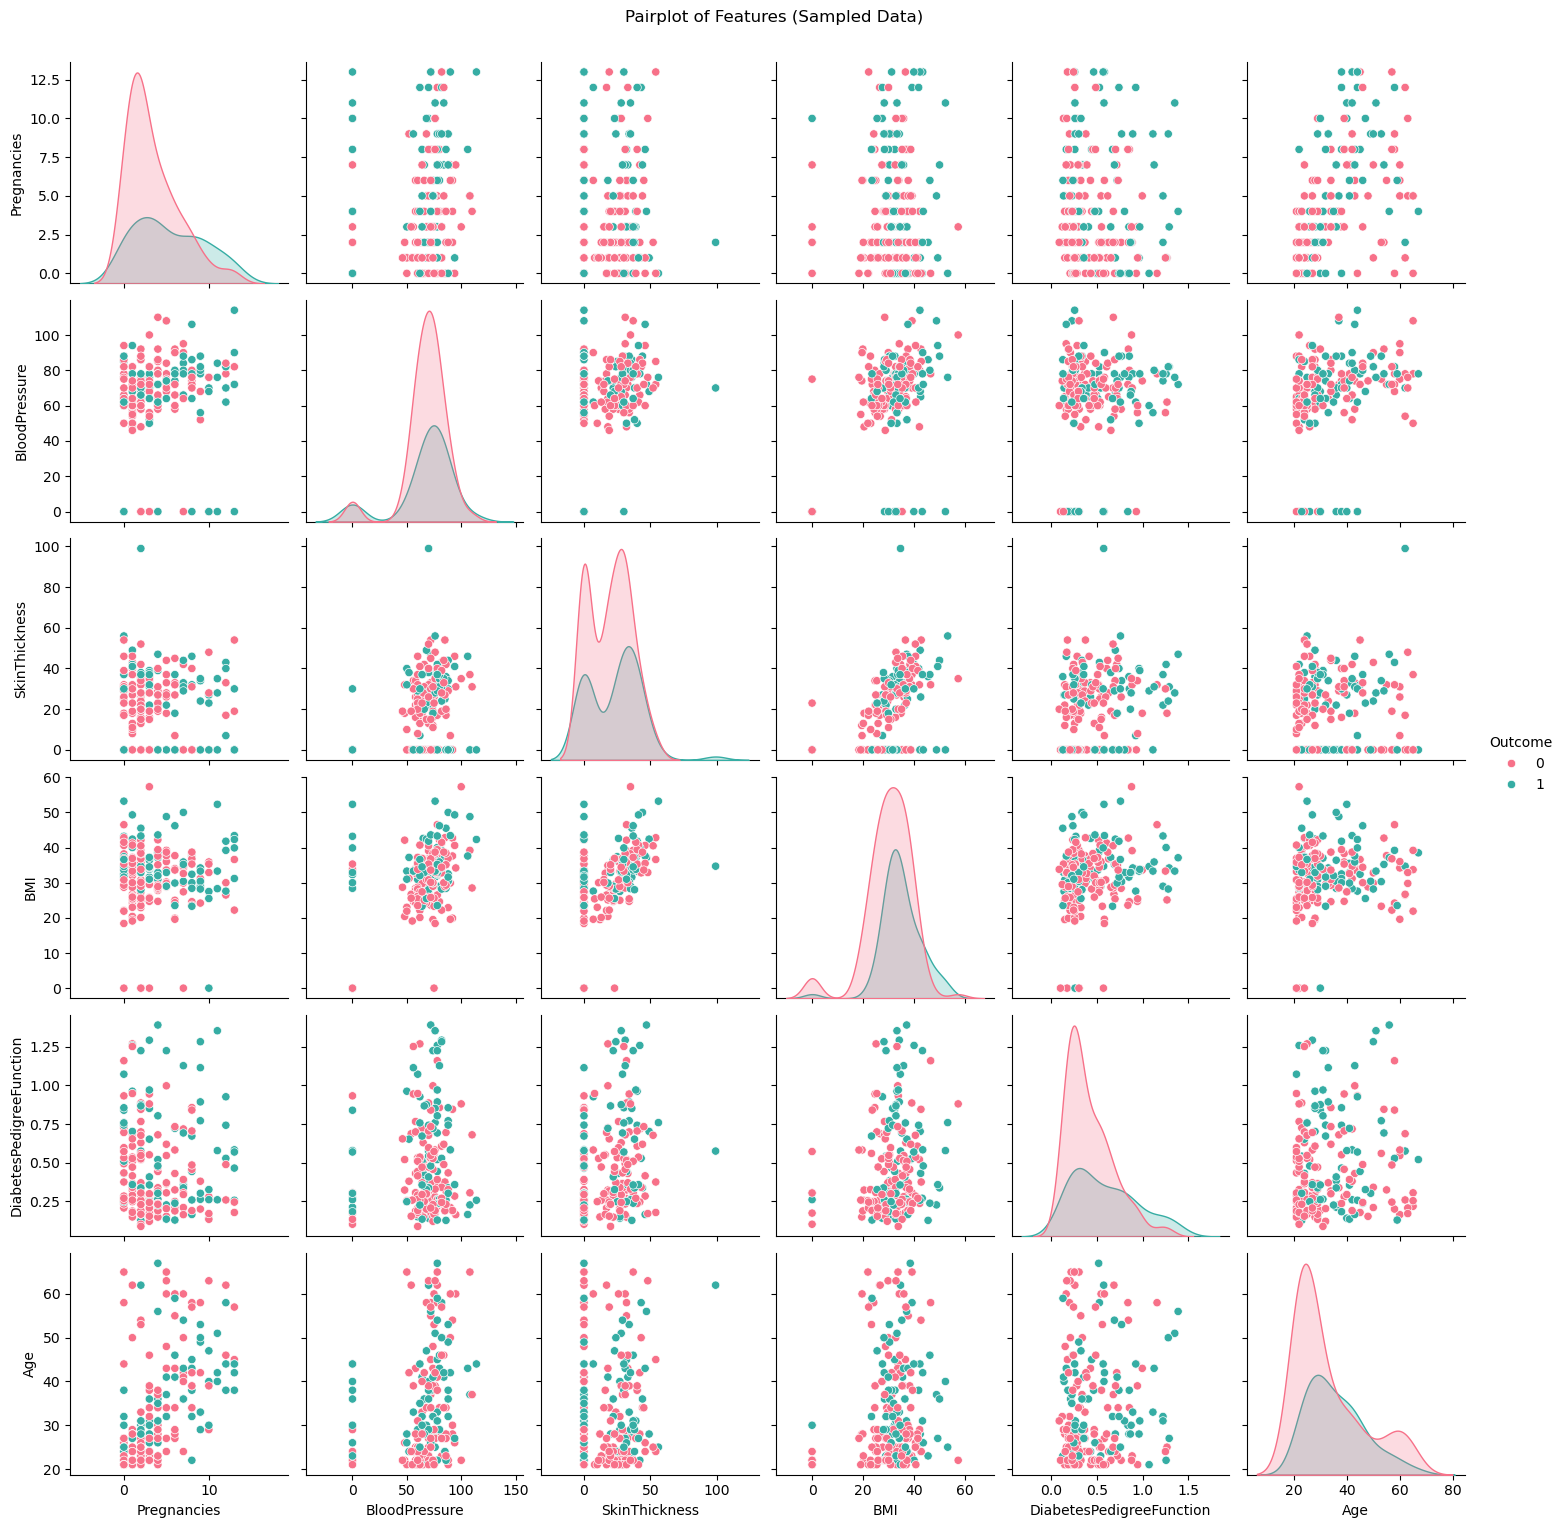

In [103]:
sample_df = df.sample(n=200, random_state=42)
sns.pairplot(sample_df, hue='Outcome', palette='husl')  # Replace with your target column
plt.suptitle("Pairplot of Features (Sampled Data)", y=1.02)
plt.show()
